In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np 
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.ticker import LogLocator

# Plots

In [2]:
def calculate_error(values):
    return np.array([np.median(values) - np.percentile(values, 25), np.percentile(values, 75) - np.median(values)])

In [27]:
def generate_plot_distance(data_approx, save, fig_name):
    # Your existing data
    distanceCBA = [np.median(data_approx[f'data_{i}qubits']['povmCBA']) for i in range(3, 7)]
    distanceDykstraCBA = [np.median(data_approx[f'data_{i}qubits']['povmDykstraCBA']) for i in range(3, 7)]
    distanceTSE = [np.median(data_approx[f'data_{i}qubits']['povmTSE']) for i in range(3, 7)]
    distanceDykstraTSE = [np.median(data_approx[f'data_{i}qubits']['povmDykstraTSE']) for i in range(3, 7)]
    
    # Calculate error bars
    errors_CBA = [calculate_error(data_approx[f'data_{i}qubits']['povmCBA']) for i in range(3, 7)]
    errors_DykstraCBA = [calculate_error(data_approx[f'data_{i}qubits']['povmDykstraCBA']) for i in range(3, 7)]
    errors_TSE = [calculate_error(data_approx[f'data_{i}qubits']['povmTSE']) for i in range(3, 7)]
    errors_DykstratSE = [calculate_error(data_approx[f'data_{i}qubits']['povmDykstraTSE']) for i in range(3, 7)]

    x_axis = [*range(3,7)]

    # Plot with error bars
    plt.errorbar(x_axis, distanceCBA, yerr=np.array(errors_CBA).T, color='black', marker='^', ls='--', label="CBA", capsize = 5)
    plt.errorbar(x_axis, distanceTSE, yerr=np.array(errors_TSE).T, color='red', marker='.', ls='-', label="TSE", capsize = 5)
    plt.errorbar(x_axis, distanceDykstraCBA, yerr=np.array(errors_DykstraCBA).T, color='blue', marker='P', ls='--', label="Dykstra + CBA", capsize = 5)
    plt.errorbar(x_axis, distanceDykstraTSE, yerr=np.array(errors_DykstratSE).T, color='green', marker='s', ls='-', label="Dykstra + TSE", capsize = 5)

    plt.yscale("log")
    plt.ylim(1e-5, 1e1)
    plt.legend(loc="lower right", fontsize='medium')
    plt.ylabel(r"$D(Z_n, Z_n^{SDP})$ ", fontsize='large')
    plt.xlabel("qubits", fontsize='large')
    plt.xticks([i for i in range(3, 7)], fontsize='large')
    plt.tick_params(axis='both', labelsize='large')
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)

    if save == True:
        plt.savefig(fig_name, dpi=400)
    plt.show()


In [28]:
def generate_plot_time(data_approx, data_sdp, save, fig_name):
    # Your existing data
    timeCBA = [np.median(data_approx[f'data_{i}qubits']['timeCBA']) for i in range(3, 7)]
    timeDykstraCBA = [np.median(data_approx[f'data_{i}qubits']['timeDykstraCBA']) for i in range(3, 7)]
    timeTSE = [np.median(data_approx[f'data_{i}qubits']['timeTSE']) for i in range(3, 7)]
    timeDykstraTSE = [np.median(data_approx[f'data_{i}qubits']['timeDykstraTSE']) for i in range(3, 7)]
    timeSDP = [np.median(data_sdp[f'data_{i}qubits']['timeSDP']) for i in range(3, 7)]
    
    # Calculate error bars
    errors_CBA = [calculate_error(data_approx[f'data_{i}qubits']['timeCBA']) for i in range(3, 7)]
    errors_DykstraCBA = [calculate_error(data_approx[f'data_{i}qubits']['timeDykstraCBA']) for i in range(3, 7)]
    errors_TSE = [calculate_error(data_approx[f'data_{i}qubits']['timeTSE']) for i in range(3, 7)]
    errors_DykstraTSE = [calculate_error(data_approx[f'data_{i}qubits']['timeDykstraTSE']) for i in range(3, 7)]
    errors_SDP = [calculate_error(data_sdp[f'data_{i}qubits']['timeSDP']) for i in range(3, 7)]
    
    x_axis = [*range(3,7)]

    # Plot with error bars
    plt.errorbar(x_axis, timeCBA, yerr=np.array(errors_CBA).T, color='black', marker='^', ls='--', label="CBA", capsize = 5)
    plt.errorbar(x_axis, timeTSE, yerr=np.array(errors_TSE).T, color='red', marker='.', ls='-', label="TSE", capsize = 5)
    plt.errorbar(x_axis, timeDykstraCBA, yerr=np.array(errors_DykstraCBA).T, color='blue', marker='P', ls='--', label="Dykstra + CBA", capsize = 5)
    plt.errorbar(x_axis, timeDykstraTSE, yerr=np.array(errors_DykstraTSE).T, color='green', marker='s', ls='-', label="Dykstra + TSE", capsize = 5)
    plt.errorbar(x_axis, timeSDP, yerr=np.array(errors_SDP).T, color='orange', marker='*', ls='-', label="Exact", capsize = 5)

    plt.yscale("log")
    plt.ylim(5e-4, 1e3)
    plt.legend(loc="upper left", fontsize='medium')
    plt.ylabel("Run time", fontsize='large')
    plt.xlabel("qubits", fontsize='large')
    plt.xticks([i for i in range(3, 7)], fontsize='large')
    plt.tick_params(axis='both', labelsize='large')
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)

    if save == True:
        plt.savefig(fig_name, dpi=400)
    plt.show()


## Plots for p = 0.1

In [29]:
import pickle
import os

# Load dictionary from file
with open('data/dataApproxPOVM_p1e1.pkl', 'rb') as pickle_file:
    data_approx = pickle.load(pickle_file)
    
# Load dictionary from file
with open('data/dataExactPOVM_p1e1.pkl', 'rb') as pickle_file:
    data_sdp = pickle.load(pickle_file)

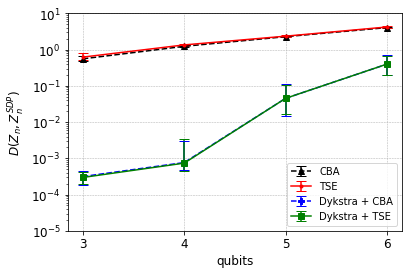

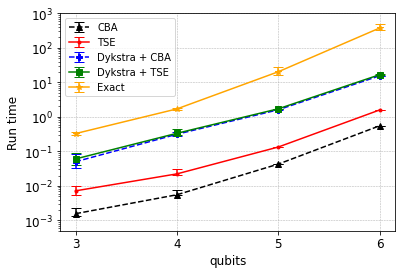

In [30]:
fig_name = None 
generate_plot_distance(data_approx, False, fig_name)
generate_plot_time(data_approx, data_sdp, False, fig_name)

## Plots for p = 0.01

In [31]:
# Load dictionary from file
with open('data/dataApproxPOVM_p1e2.pkl', 'rb') as pickle_file:
    data_approx = pickle.load(pickle_file)
    
# Load dictionary from file
with open('data/dataExactPOVM_p1e2.pkl', 'rb') as pickle_file:
    data_sdp = pickle.load(pickle_file)

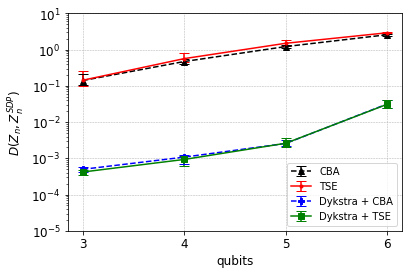

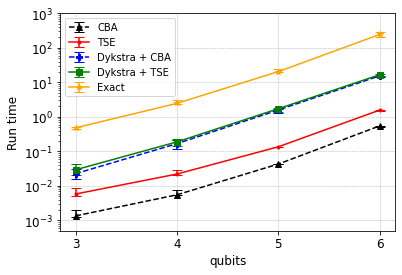

In [32]:
fig_name = None 
generate_plot_distance(data_approx, False, fig_name)
generate_plot_time(data_approx, data_sdp, False, fig_name)

## Plots for p = 0.001

In [33]:
# Load dictionary from file
with open('data/dataApproxPOVM_p1e3.pkl', 'rb') as pickle_file:
    data_approx = pickle.load(pickle_file)
    
# Load dictionary from file
with open('data/data/dataExactPOVM_p1e3.pkl', 'rb') as pickle_file:
    data_sdp = pickle.load(pickle_file)

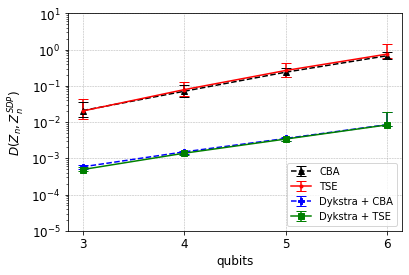

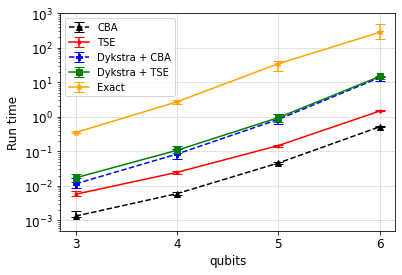

In [34]:
fig_name = None 
generate_plot_distance(data_approx, False, fig_name)
generate_plot_time(data_approx, data_sdp, False, fig_name)